In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("final_renamed_merged_data.csv")
df.astype(np.float32)
df = df.loc[:, 
            ["FastingGlucose_mmol_L", "FastingInsulin_uU_mL", "Gender", "AgeYears", "Race_Ethnicity", "CitizenshipStatus", 
             "YearsInUS", "EducationLevel_Youth6_19", "EducationLevel_Adults20+", "MaritalStatus", "HouseholdSize", "FamilySize",
             "IncomeToPovertyRatio", "PregnancyStatus", "InterviewLang_SP", "ProxyUsed_SP_Interview", "InterpreterUsed_SP_Interview",
             "InterviewSampleWeight", "ExamSampleWeight", "AnnualHouseholdIncome", "AnnualFamilyIncome", "CountryOfBirth"]]
df["HOMA-IR"] = (df["FastingGlucose_mmol_L"] * df["FastingInsulin_uU_mL"]) / (22.5 * 4.0)
df = df.drop(columns=["FastingGlucose_mmol_L", "FastingInsulin_uU_mL"])
df.columns

Index(['Gender', 'AgeYears', 'Race_Ethnicity', 'CitizenshipStatus',
       'YearsInUS', 'EducationLevel_Youth6_19', 'EducationLevel_Adults20+',
       'MaritalStatus', 'HouseholdSize', 'FamilySize', 'IncomeToPovertyRatio',
       'PregnancyStatus', 'InterviewLang_SP', 'ProxyUsed_SP_Interview',
       'InterpreterUsed_SP_Interview', 'InterviewSampleWeight',
       'ExamSampleWeight', 'AnnualHouseholdIncome', 'AnnualFamilyIncome',
       'CountryOfBirth', 'HOMA-IR'],
      dtype='object')

In [3]:
df["HOMA-IR"].fillna(df["HOMA-IR"].mean(), inplace=True)

/var/folders/0p/m857mgxx5c91dkwz9jdmp0wm0000gp/T/ipykernel_23792/2030775320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HOMA-IR"].fillna(df["HOMA-IR"].mean(), inplace=True)


In [4]:
df.dropna(inplace=True, axis=1)
df.count()

Gender                   13487
AgeYears                 13487
Race_Ethnicity           13487
HouseholdSize            13487
FamilySize               13487
InterviewSampleWeight    13487
ExamSampleWeight         13487
HOMA-IR                  13487
dtype: int64

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
df.describe()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
count,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000
mean,1.507089,41.859443,2.920095,3.482496,3.290653,28527.929461,29537.418175,0.728896
std,0.499972,21.892257,1.206911,1.738507,1.790413,20931.873178,21603.081932,0.414513
min,1.000000,12.000000,1.000000,1.000000,1.000000,1339.046608,1363.174167,0.011964
25%,1.000000,21.000000,2.000000,2.000000,2.000000,13268.885224,13703.067131,0.396195
50%,2.000000,39.000000,3.000000,3.000000,3.000000,22151.304825,22925.272926,0.650255
75%,2.000000,61.000000,4.000000,5.000000,5.000000,36014.795494,37368.405397,0.954011
max,2.000000,85.000000,5.000000,7.000000,7.000000,88557.936848,92964.539844,1.981422


In [7]:
df.head()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
0,2.0,85.0,3.0,1.0,1.0,29960.839509,34030.994786,0.954011
1,2.0,44.0,4.0,4.0,4.0,26457.708180,26770.584605,0.556776
2,1.0,70.0,3.0,2.0,2.0,32961.509920,35315.538900,0.870532
3,2.0,16.0,4.0,3.0,3.0,5635.221296,5920.617679,0.583911
4,1.0,73.0,3.0,2.0,2.0,43718.506372,44231.167252,0.894945


In [8]:
print(list(df.columns))

['Gender', 'AgeYears', 'Race_Ethnicity', 'HouseholdSize', 'FamilySize', 'InterviewSampleWeight', 'ExamSampleWeight', 'HOMA-IR']


In [9]:
x = df.loc[:, ['Gender', 'AgeYears', 'Race_Ethnicity', 'HouseholdSize', 'FamilySize', 'InterviewSampleWeight', 'ExamSampleWeight']].values
x = StandardScaler().fit_transform(x)
y = df.loc[:,['HOMA-IR']].values


In [10]:
x = pd.DataFrame(x, columns=df.columns[0:7])
x.head()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight
0,0.985921,1.970671,0.066209,-1.428010,-1.279455,0.068459,0.208015
1,0.985921,0.097781,0.894807,0.297684,0.396209,-0.098907,-0.128081
2,-1.014280,1.285468,0.066209,-0.852778,-0.720900,0.211819,0.267479
3,0.985921,-1.181266,0.894807,-0.277547,-0.162346,-1.093725,-1.093262
4,-1.014280,1.422508,0.066209,-0.852778,-0.720900,0.725747,0.680199


In [11]:
x.describe()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight
count,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04
mean,1.722566e-16,-1.106919e-16,7.959870e-17,-1.989967e-17,9.965384e-17,-4.974919e-17,8.457361e-17
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-1.014280e+00,-1.363987e+00,-1.590986e+00,-1.428010e+00,-1.279455e+00,-1.298979e+00,-1.304234e+00
25%,-1.014280e+00,-9.528646e-01,-7.623882e-01,-8.527782e-01,-7.209003e-01,-7.290180e-01,-7.329993e-01
50%,9.859209e-01,-1.306201e-01,6.620950e-02,-2.775469e-01,-1.623456e-01,-3.046504e-01,-3.060876e-01
75%,9.859209e-01,8.743454e-01,8.948072e-01,8.729158e-01,9.547640e-01,3.576934e-01,3.625098e-01
max,9.859209e-01,1.970671e+00,1.723405e+00,2.023378e+00,2.071873e+00,2.868001e+00,2.936150e+00


In [12]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.224694,-1.292217,1.130159,-0.144176,0.812259
1,0.244652,0.086683,0.630742,1.173726,0.458035
2,-1.444232,-0.656136,-0.825610,-0.659396,0.641428
3,0.814965,-1.048424,0.508212,1.556583,-1.095662
4,-1.843347,-0.152308,-0.808385,-0.761135,0.796866


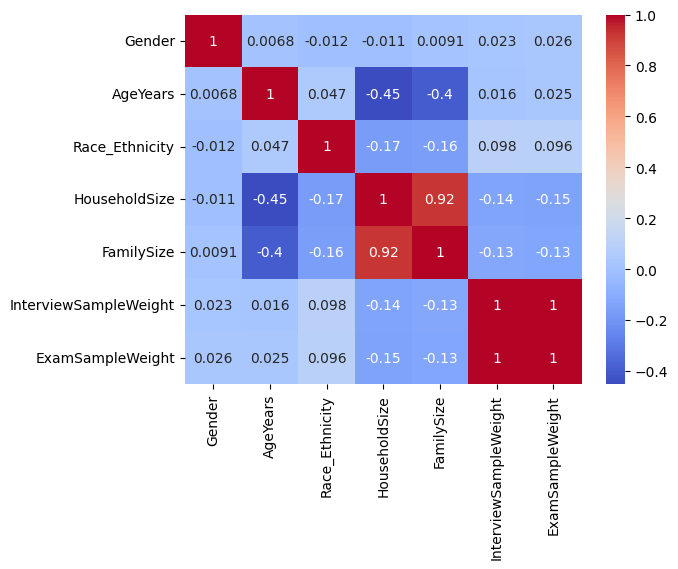

In [14]:
import seaborn as sns
#//create a heat map using seaborn

f = sns.heatmap(x.corr(), annot=True, cmap='coolwarm')

Explained variance by each principal component:
[0.34869835 0.26227198 0.14361557 0.13627258 0.09817518]


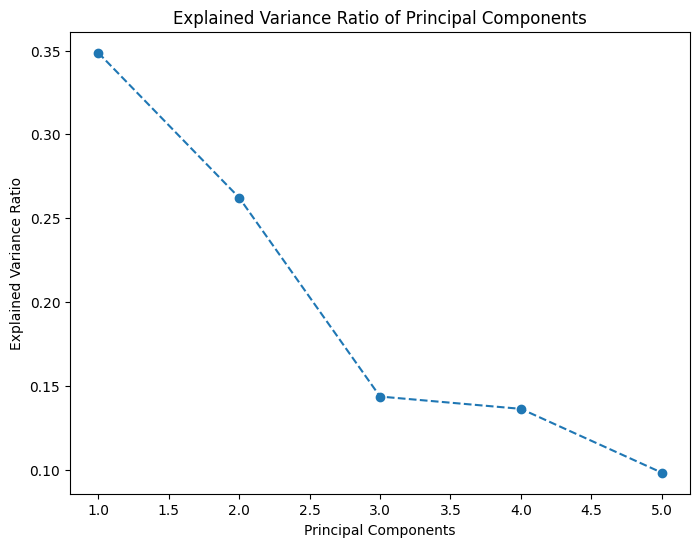

In [41]:
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained variance by each principal component:")
print(explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [31]:
finalDf = pd.concat([principalDf, df["HOMA-IR"]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,HOMA-IR
0,-2.224694,-1.292217,0.954011
1,0.244652,0.086683,0.556776
2,-1.444232,-0.656136,0.870532
3,0.814965,-1.048424,0.583911
4,-1.843347,-0.152308,0.894945


In [32]:
finalDf.dropna(inplace=True)
print(finalDf.isnull().sum())

principal component 1    0
principal component 2    0
HOMA-IR                  0
dtype: int64


In [33]:
finalDf.to_csv('data2d.csv', index=False)

In [42]:
df = (df - df.min()) / (df.max() - df.min())
df.head()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
0,1.0,1.000000,0.50,0.000000,0.000000,0.328160,0.356630,0.478328
1,1.0,0.438356,0.75,0.500000,0.500000,0.287996,0.277369,0.276631
2,0.0,0.794521,0.50,0.166667,0.166667,0.362564,0.370653,0.435941
3,1.0,0.054795,0.75,0.333333,0.333333,0.049257,0.049753,0.290408
4,0.0,0.835616,0.50,0.166667,0.166667,0.485898,0.467984,0.448337


In [43]:
df.describe()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
count,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000
mean,0.507089,0.409033,0.480024,0.413749,0.381775,0.311732,0.307574,0.364025
std,0.499972,0.299894,0.301728,0.289751,0.298402,0.239992,0.235838,0.210471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.123288,0.250000,0.166667,0.166667,0.136780,0.134713,0.195095
50%,1.000000,0.369863,0.500000,0.333333,0.333333,0.238621,0.235391,0.324094
75%,1.000000,0.671233,0.750000,0.666667,0.666667,0.397572,0.393064,0.478328
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.to_csv('data.csv', index=False)

In [29]:
x = pd.read_csv("data.csv")
x.describe()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
count,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000
mean,0.507697,0.410810,0.476716,0.417627,0.385226,0.334020,0.333021,0.395502
std,0.499965,0.306224,0.311053,0.292902,0.301181,0.227063,0.225623,0.217827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109589,0.250000,0.166667,0.166667,0.161614,0.162704,0.217844
50%,1.000000,0.369863,0.500000,0.333333,0.333333,0.283231,0.281349,0.358257
75%,1.000000,0.684932,0.750000,0.666667,0.666667,0.441157,0.439686,0.529651
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for column in df.columns:
    plt.figure()
    df[column].plot(kind='hist', title=f"Distribution {column}", edgecolor='black')
    plt.savefig(f"data_analysis/{column}_histogram.png")
    plt.close()

In [44]:
df.corr()

,Gender,AgeYears,Race_Ethnicity,HouseholdSize,FamilySize,InterviewSampleWeight,ExamSampleWeight,HOMA-IR
Gender,1.000000,0.006784,-0.011608,-0.011337,0.009089,0.023187,0.025925,-0.001905
AgeYears,0.006784,1.000000,0.047440,-0.452210,-0.400102,0.016493,0.025453,0.037379
Race_Ethnicity,-0.011608,0.047440,1.000000,-0.169299,-0.158079,0.098284,0.096473,-0.066504
HouseholdSize,-0.011337,-0.452210,-0.169299,1.000000,0.923307,-0.136403,-0.145288,0.028250
FamilySize,0.009089,-0.400102,-0.158079,0.923307,1.000000,-0.126362,-0.134438,0.038310
InterviewSampleWeight,0.023187,0.016493,0.098284,-0.136403,-0.126362,1.000000,0.997612,-0.104859
ExamSampleWeight,0.025925,0.025453,0.096473,-0.145288,-0.134438,0.997612,1.000000,-0.105243
HOMA-IR,-0.001905,0.037379,-0.066504,0.028250,0.038310,-0.104859,-0.105243,1.000000


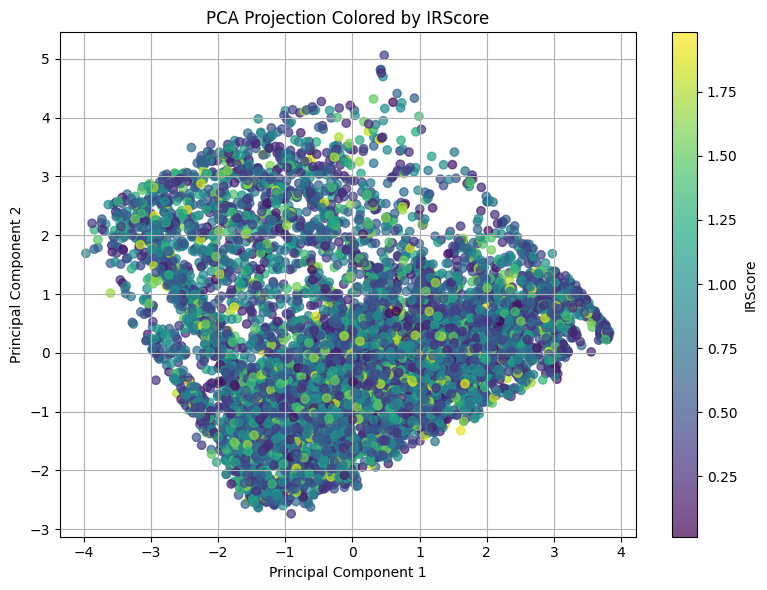

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data2d.csv")

# Columns must match these names (adjust if yours differ)
X = df[['principal component 1', 'principal component 2']]
y = df['HOMA-IR']  # or whatever your target column is

# If your IRScore is continuous, you might want to binarize for visualization
# For example:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X['principal component 1'],
    X['principal component 2'],
    c=y,                    # Color by continuous IRScore
    cmap='viridis',         # Try 'plasma', 'coolwarm', etc.
    alpha=0.7
)
plt.colorbar(scatter, label='IRScore')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection Colored by IRScore')
plt.grid(True)
plt.tight_layout()
plt.show()

#y_bin = (y > 0.5).astype(int)

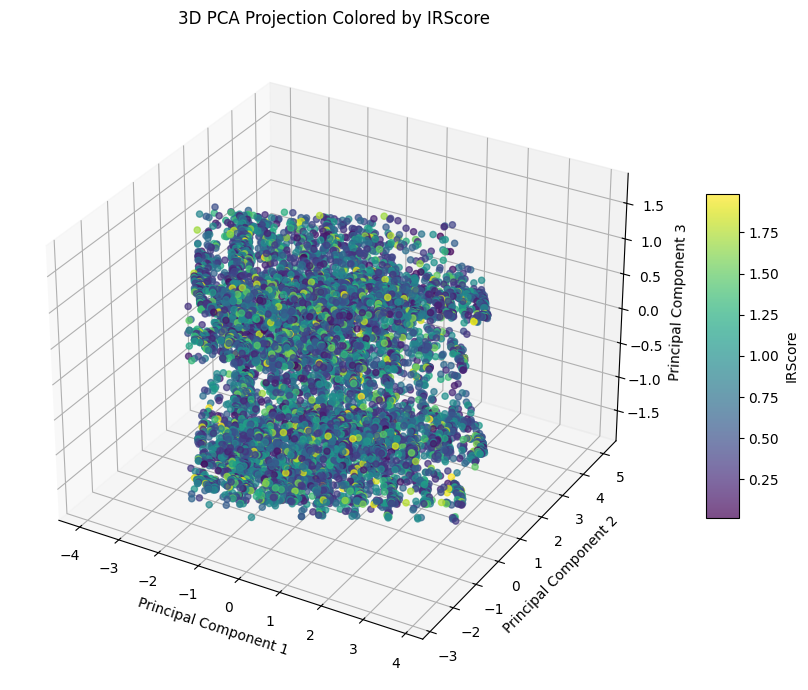

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X['principal component 1'],
    X['principal component 2'],
    X['principal component 3'],
    c=y,
    cmap='viridis',
    alpha=0.7
)

# === Labels and colorbar ===
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Projection Colored by IRScore')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('IRScore')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X['principal component 1'],
    X['principal component 2'],
    c=y,                 # continuous target
    cmap='viridis',      # or 'plasma', 'coolwarm', etc.
    alpha=0.7
)
plt.colorbar(scatter, label='IRScore')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection Colored by IRScore')
plt.grid(True)
plt.show()

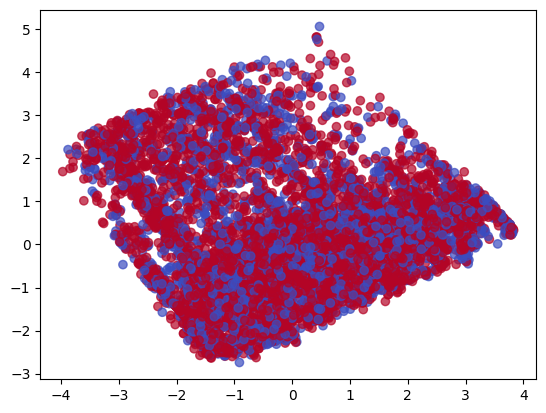

In [93]:
plt.scatter(
    X['principal component 1'],
    X['principal component 2'],
    c=y_bin,            # must be ints or floats, not np.float64(1.0)
    cmap='coolwarm',
    alpha=0.7
)

ValueError: 'c' argument has 9774 elements, which is inconsistent with 'x' and 'y' with size 11426.

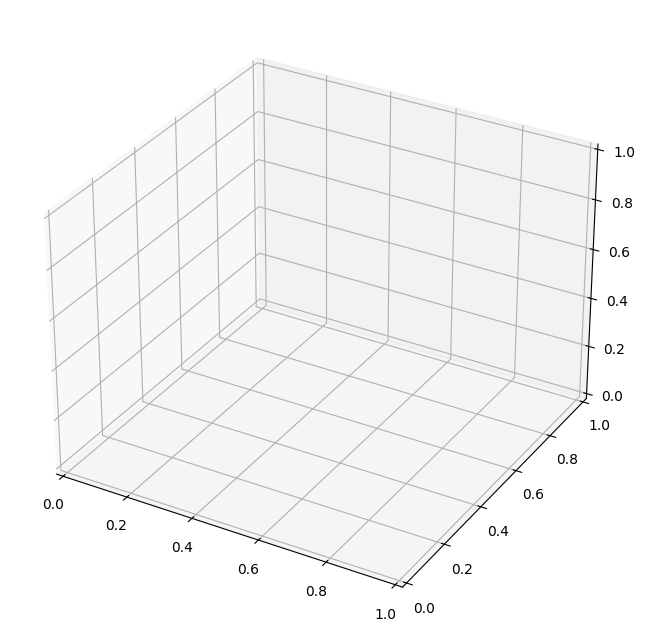

In [92]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2], c=y_bin, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Projection Colored by IRScore (Binarized)')
plt.colorbar(sc, label='IRScore > 0.5')
plt.show()
